In [1]:
import numpy as np
import pickle
import pathlib
import pyimfit
from astropy.io import fits
import corner
import matplotlib.pyplot as plt
import pandas as pd

In [141]:
with open("../chain/chainResults/J1215+1344_MCstat_0.pkl", "rb") as file:
    d0 = pickle.load(file)    
with open("../chain/chainResults/J1215+1344_MCstat_1.pkl", "rb") as file:
    d1 = pickle.load(file)    

In [142]:
d0

{'burn-in': 300,
 'paramNames': ['X0_1',
  'Y0_1',
  'I_tot_1',
  'PA_2',
  'ell_bulge_2',
  'I_e_2',
  'r_e_2'],
 'params': [49.47274991098654,
  56.746711824957444,
  1377.3755386955,
  65.98579261587689,
  0.37586064592700025,
  22.935714462919297,
  10.961819721607824],
 'err': array([[8.44176189e-02, 8.34229171e-02],
        [6.52718026e-02, 6.85037533e-02],
        [1.12823339e+02, 1.12878126e+02],
        [1.31438072e+00, 1.28164101e+00],
        [1.29742298e-02, 1.36413178e-02],
        [9.01125261e-01, 8.92621438e-01],
        [2.18426667e-01, 2.24627551e-01]]),
 'fitStat': 1641.1158947621475,
 'BIC': 1705.5882773659807,
 'Bayes factor': [1, 0.0]}

In [81]:
df = pd.concat([pd.DataFrame(d0['params'],d0['paramNames'],columns=['1PSF+Sersic']),pd.DataFrame(d1['params'],d1['paramNames'],columns=['2PSF+Sersic'])], axis=1)
df1 = pd.concat([pd.DataFrame(d0['err'],d0['paramNames'],columns=['err0_0','err1_0']),pd.DataFrame(d1['err'],d1['paramNames'],columns=['err0_1',"err1_1"])], axis=1)
dff=pd.concat([df,df1], axis=1)
dff

,1PSF+Sersic,2PSF+Sersic,err0_0,err1_0,err0_1,err1_1
X0_1,49.472750,53.419612,0.084418,0.083423,0.077140,0.084824
Y0_1,56.746712,53.526303,0.065272,0.068504,0.087378,0.094185
I_tot_1,1377.375539,2168.554118,112.823339,112.878126,83.898649,74.433223
PA_2,65.985793,294.664330,1.314381,1.281641,5.213075,5.889038
ell_bulge_2,0.375861,0.403957,0.012974,0.013641,0.073198,0.077223
I_e_2,22.935714,1.369886,0.901125,0.892621,0.267777,0.280217
r_e_2,10.961820,27.489598,0.218427,0.224628,2.801558,3.384050
X0_2,NaN,48.409142,NaN,NaN,0.074660,0.073088
Y0_2,NaN,57.655579,NaN,NaN,0.070851,0.068895
I_tot_3,NaN,1923.482614,NaN,NaN,125.876441,109.621755


In [85]:
import pandas as pd

print(dfd.to_latex(index=True,
                  float_format='{:.3f}'.format))

\begin{tabular}{lrrrrrr}
\toprule
 & 1PSF+Sersic & err0_0 & err1_0 & 2PSF+Sersic & err0_1 & err1_1 \\
\midrule
X0_1 & 49.473 & 0.084 & 0.083 & 53.420 & 0.077 & 0.085 \\
Y0_1 & 56.747 & 0.065 & 0.069 & 53.526 & 0.087 & 0.094 \\
I_tot_1 & 1377.376 & 112.823 & 112.878 & 2168.554 & 83.899 & 74.433 \\
PA_2 & 65.986 & 1.314 & 1.282 & 294.664 & 5.213 & 5.889 \\
ell_bulge_2 & 0.376 & 0.013 & 0.014 & 0.404 & 0.073 & 0.077 \\
I_e_2 & 22.936 & 0.901 & 0.893 & 1.370 & 0.268 & 0.280 \\
r_e_2 & 10.962 & 0.218 & 0.225 & 27.490 & 2.802 & 3.384 \\
X0_2 & NaN & NaN & NaN & 48.409 & 0.075 & 0.073 \\
Y0_2 & NaN & NaN & NaN & 57.656 & 0.071 & 0.069 \\
I_tot_3 & NaN & NaN & NaN & 1923.483 & 125.876 & 109.622 \\
PA_4 & NaN & NaN & NaN & 248.869 & 2.244 & 2.367 \\
ell_bulge_4 & NaN & NaN & NaN & 0.380 & 0.021 & 0.023 \\
I_e_4 & NaN & NaN & NaN & 15.890 & 0.913 & 0.909 \\
r_e_4 & NaN & NaN & NaN & 10.783 & 0.443 & 0.461 \\
\bottomrule
\end{tabular}



In [124]:
imageAGN = fits.getdata("../fit/agn.fits")
def getFit(fitfile):
    fitpath = pathlib.Path.joinpath(pathlib.Path("../fit/fitResults"), fitfile)
    with open(fitpath, 'rb') as file:
        f = pickle.load(file)
    model = f['fitConfig']
    bestfits = f['fitResult']['params']
    epsf = fits.getdata("../psfConstruction/psfResults/epsf.fits")
    psfOsamp = pyimfit.MakePsfOversampler(epsf, 4, (0,100,0,100))
    osampleList = [psfOsamp]
    fitter = pyimfit.Imfit(model,psf=epsf)
    fitter.loadData(imageAGN, psf_oversampling_list=osampleList, gain=9.942e-1, read_noise=0.22, original_sky=15.683)
    fitter.computeFitStatistic(bestfits)
    return fitter, bestfits

In [125]:
with open("../chain/chainResults/chain_n1m0.pkl", "rb") as file:
    d0 = pickle.load(file)    
with open("../chain/chainResults/chain_n1m1.pkl", "rb") as file:
    d1 = pickle.load(file) 

converged_sample0 = d0['chain'][:,300:,:]
converged_sample1 = d1['chain'][:,500:,:]


s0 = converged_sample0.shape
c0 = np.reshape(converged_sample0, (s0[0]*s0[1], s0[2]))

s1 = converged_sample1.shape
c1 = np.reshape(converged_sample1, (s1[0]*s1[1], s1[2]))

In [126]:
def lnPrior_func(params,imfitter,rmind):
    parameterLimits = imfitter.getParameterLimits()
    parameterLimits = [element for indx, element in enumerate(parameterLimits) if indx not in rmind]
    parameterLimits = [(0,100000) if e is None else e for e in parameterLimits]
    nParams = len(params)
    for i in range(nParams):
        if params[i] < parameterLimits[i][0] or params[i] > parameterLimits[i][1]:
            return  -np.inf
    return 0.0


def lnPosterior_pf(params, imfitter, lnPrior_func, rmInd, insInd):
    lnPrior = lnPrior_func(params, imfitter, rmInd)
    if not np.isfinite(lnPrior):
        return -np.inf
    params = np.insert(params,insInd,1)
    
    lnLikelihood = -0.5 * imfitter.computeFitStatistic(params)
    return lnPrior + lnLikelihood


In [127]:
fitter0, bestfits0 = getFit("J1215+1344_n1m0_fit.pkl")
fitter0.computeFitStatistic(bestfits0)

PsfOversampling: starting initialization...
141
PsfOversampling: done.
PsfOversampling: starting __dealloc__.
PsfOversampling: done with __dealloc__.


1640.9389548968174

In [128]:
fitter1, bestfits1 = getFit("J1215+1344_n1m1_fit.pkl")
fitter1.computeFitStatistic(bestfits1)

PsfOversampling: starting initialization...
141
PsfOversampling: done.
PsfOversampling: starting __dealloc__.
PsfOversampling: done with __dealloc__.


879.0334546691439

In [117]:
rmInd = [[5],[5,13]]
insInd = [[5],[5,12]]

In [129]:
params0 = [np.percentile(c0[:,i],50) for i in range(7)]
params1 = [np.percentile(c1[:,i],50) for i in range(14)]
lnp0 = lnPosterior_pf(params0, fitter0, lnPrior_func, rmInd[0], insInd[0])
lnp1 = lnPosterior_pf(params1, fitter1, lnPrior_func, rmInd[1], insInd[1])

In [132]:
-2*lnp1

878.2546823982578

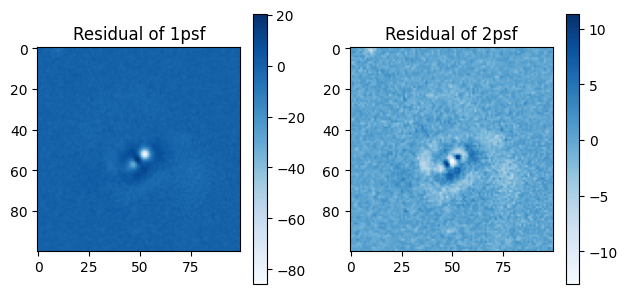

In [120]:
fig,ax = plt.subplots(1,2)
im0 = ax[0].imshow(fitter0.getModelImage(newParameters=np.insert(params0,insInd[0],1))-imageAGN, cmap="Blues")
im1= ax[1].imshow(fitter1.getModelImage(newParameters=np.insert(params1,insInd[1],1))-imageAGN, cmap="Blues")
for j, im in zip(np.arange(3), [im0,im1]):
    cbar = fig.colorbar(im, ax=ax[j], shrink=0.6)
ax[0].set_title("Residual of 1psf")
ax[1].set_title("Residual of 2psf")
fig.tight_layout()

In [51]:
# BAYES factor
np.exp(-0.5*(lnp1-lnp0))

4.6838743267609985e-84

(array([  22.,   21.,  105.,  422., 1117., 2818., 5751., 8234., 5369.,
        1141.]),
 array([-457.15454848, -455.12688348, -453.09921848, -451.07155348,
        -449.04388848, -447.01622348, -444.98855847, -442.96089347,
        -440.93322847, -438.90556347, -436.87789847]),
 <BarContainer object of 10 artists>)

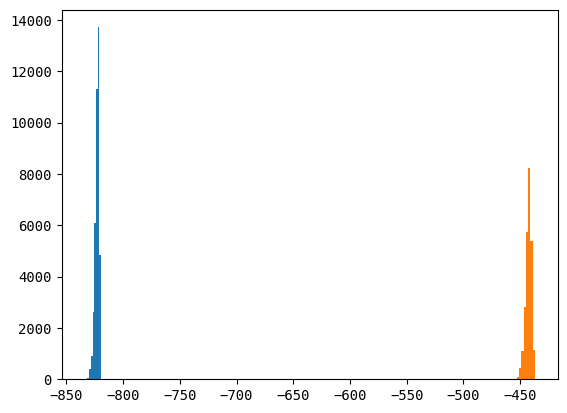

In [63]:
plt.hist(d0['flatlnprobability'][10000:])
plt.hist(d1['flatlnprobability'][25000:])

In [67]:
[np.percentile(c0[:,i],50) for i in range(7)]

[49.47151553341845,
 56.748397030049645,
 1379.3107936174722,
 65.98573450945277,
 0.37599525805030737,
 22.934438561818247,
 10.964920123929346]

In [68]:
lnPosterior_pf([np.percentile(c0[:,i],50) for i in range(7)], fitter0, lnPrior_func, rmInd[0], insInd[0])

-819.5953028630287

In [70]:
lnPosterior_pf([np.percentile(c1[:,i],50) for i in range(14)], fitter1, lnPrior_func, rmInd[1], insInd[1])

-435.8492584701315